In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report,auc,roc_curve,accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
data= pd.read_csv('santander-train-Copy1.csv')

In [6]:
pd.pandas.set_option('display.max_columns',None)

In [7]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [9]:
data.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [10]:
len(data.columns)

371

In [11]:
data.shape

(76020, 371)

In [15]:
data.isnull().sum().sort_values(ascending=False).head(10)

TARGET                0
num_op_var41_ult1     0
num_var26             0
num_var25_0           0
num_var25             0
num_op_var40_hace2    0
num_op_var40_hace3    0
num_op_var40_ult1     0
num_op_var40_ult3     0
num_op_var41_hace2    0
dtype: int64

In [21]:
data.nunique().sort_values(ascending=False).head()

ID                       76020
var38                    57736
saldo_medio_var5_ult3    17330
saldo_var30              16940
saldo_var42              15730
dtype: int64

In [22]:
data.drop(columns='ID',inplace=True)

In [23]:
round(data.describe(),1)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [24]:
data['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

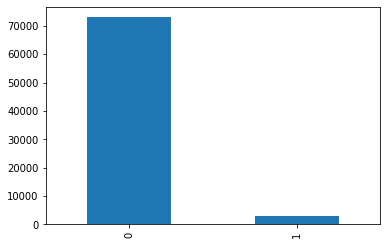

In [26]:
data['TARGET'].value_counts().plot(kind='bar')
plt.show()

In [27]:
x = data.drop(columns=['TARGET'])
y = data['TARGET']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [29]:
x_train.shape,y_train.shape

((4319, 369), (4319,))

In [30]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

#### Remove constant 

In [31]:
var = VarianceThreshold(threshold=0.01)
x_train_unique = var.fit_transform(x_train_scalled)
x_test_unique  = var.transform(x_test_scalled)

In [32]:
x_train_unique.shape,x_test_unique.shape

((4319, 247), (15204, 247))

#### Remove duplicated.

In [33]:
x_train_T = pd.DataFrame(x_train_unique.T)
x_test_T  = pd.DataFrame(x_test_unique.T)

In [34]:
duplicated = x_train_T.duplicated().sum()
duplicated

31

In [35]:
duplicated_records =x_train_T.duplicated()

In [36]:
keep_them = [not i for i in duplicated_records]

In [37]:
X_train = x_train_T[keep_them].T
X_test  = x_test_T[keep_them].T

In [38]:
X_train.shape,X_test.shape

((4319, 216), (15204, 216))

### lets take feature engineering.

In [39]:
X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)

In [40]:
corrmat = X_train.corr()
corrmat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,37,38,40,41,42,43,44,46,48,49,50,51,52,53,55,56,58,61,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,87,88,90,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,109,110,111,113,116,118,119,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,140,141,142,143,144,145,146,147,148,151,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,242,243,244,245,246
0,1.000000,-0.003781,0.001806,0.006527,0.007211,0.001509,0.001836,0.001250,0.001204,0.001626,0.006618,0.007246,0.005691,0.006410,0.007068,0.005593,0.006298,0.007102,0.000854,0.003191,0.002290,-0.007617,-0.030615,0.007270,0.006200,0.006389,0.005129,0.005139,0.004733,0.004589,0.002010,0.005005,0.003879,0.002024,0.000927,0.001468,0.000927,0.005039,0.004619,0.005893,0.005552,0.005971,0.005490,-0.001789,-0.026934,0.001538,0.001466,0.000927,0.000802,0.008585,0.008110,0.008877,0.008768,0.001227,0.001135,0.003157,-0.003324,-0.006126,-0.030071,0.007270,0.006200,0.002637,0.005107,0.004986,0.004651,0.004589,0.001896,0.001930,0.004943,0.001290,0.002024,0.000736,0.000756,0.000927,0.005039,0.004619,0.004862,0.004801,0.000859,0.001349,0.001471,0.006924,0.002413,0.008398,0.008633,0.006938,0.008414,0.008650,0.003970,-0.022058,0.001077,0.001077,0.000756,-0.002558,0.004890,0.005856,0.009926,0.009599,0.002753,-0.024974,0.001135,0.001735,0.002302,0.002209,0.002732,0.003531,0.001680,0.003911,0.001098,0.000799,0.000659,0.002721,0.004305,0.004228,0.005054,0.001061,0.000799,0.002022,0.003381,0.000876,0.016551,0.001735,0.000927,0.000927,0.000655,0.000463,0.000655,0.000927,0.002448,0.001410,0.000778,0.000509,0.000533,0.000725,0.000588,0.000463,0.001480,0.002097,0.000463,0.000559,0.001606,0.009394,0.009985,0.010159,0.009589,0.007573,0.010760,0.002549,0.002931,0.001687,0.001451,0.000621,0.001037,0.005780,0.005272,0.010884,0.008494,0.011047,0.010512,0.010612,-0.033483,0.005846,0.004967,0.004523,0.001520,0.013093,0.001135,0.007751,0.008039,0.001403,0.001658,0.001336,0.001293,0.007726,0.008011,0.007305,0.007537,0.007302,0.007527,0.000655,0.001383,0.005450,0.008512,0.003251,0.000463,0.000621,0.008851,0.007920,0.009042,0.010474,0.002517,0.002225,0.002472,0.002751,0.001560,0.000553,0.002175,0.002042,0.002315,0.001758,0.002690,0.002760,0.003255,0.001756,0.003493,0.003523,0.001230,0.001048,0.001320,0.001352,0.000722,0.000588,0.000489,0.000805,0.000824,-0.002108
1,-0.003781,1.000000,0.029811,0.052883,0.062555,0.036743,0.044627,0.037181,0.028130,0.032794,0.047835,0.057257,0.093426,0.103654,0.082361,0.093214,0.102573,0.083890,-0.003640,0.095393,0.058658,-0.095710,-0.143138,0.086460,0.072518,0.134110,0.109095,0.153904,0.123556,0.124438,0.105237,0.155211,0.058937,0.025284,0.024584,0.034763,-0.062721,0.138148,0.122511,0.060936,0.064227,0.066262,0.059627,-0.056898,-0.077019,0.067325,0.065962,0.037650,0.035002,0.109697,0.096674,-0.002702,-0.009130,0.065767,0.065039,0.091454,0.065229,-0.084409,-0.140389,0.086460,0.072518,0.067143,0.108098,0.149402,0.121481,0.124438,0.091356,0.100034,0.155431,0.034658,0.025284,0.018648,0.020555,-0.062721,0.138148,0.122511,0.051363,0.045993,0.018406,0.021963,0.025295,0.049405,0.013961,0.048106,0.053694,0.050316,0.049999,0.055301,0.100860,-0.023510,0.037974,0.040072,0.040918,0.068744,0.088308,0.104351,0.022621,0.001952,0.063166,-0.076417,0.065039,0.045253,0.092533,0.021179,0.096563,0.109534,0.099212,0.139230,0.002011,0.025307,-0.049273,0.096920,0.061562,0.056758,0.180049,0.049385,0.033013,0.035172,0.120529,0.071689,-0.020913,0.044139,0.024584,0.051310,-0.011171,0.001601,0.025777,0.051310,0.095614,0.037351,0.030217,0.006526,0.005160,0.046384,-0.014462,0.001601,0.007648,0.030550,0.002789,0

In [45]:
def correlated_features(data,thresh):
    
    cormat = data.corr()
    corr_col = set()
    
    for i in range(len(cormat.columns)):
        for j in range(i):
            
            if abs(cormat.iloc[i,j])>thresh:
                corr_columns = cormat.columns[i]
                corr_col.add(corr_columns)
                
    return corr_col

In [48]:
features=correlated_features(X_train,1)
len(features)

5

In [49]:
X_train_uncorr = X_train.drop(columns=features)
X_test_uncorr  = X_test.drop(columns=features)

In [50]:
X_train_uncorr.shape,X_test_uncorr.shape

((4319, 211), (15204, 211))

### Make the imbalance to Balance datasets.

In [52]:
y_train.value_counts()

1    2407
0    1912
Name: TARGET, dtype: int64

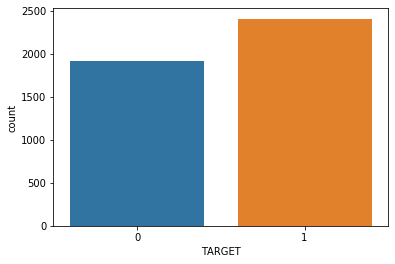

In [53]:
sns.countplot(y_train)
plt.show()

In [56]:
print('y_train before the oversampling with 0 :- :',len(y_train[y_train==0]))
print('y_train before the oversampling with 1 :- :',len(y_train[y_train==1]))

y_train before the oversampling with 0 :- : 1912
y_train before the oversampling with 1 :- : 2407


In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [59]:
x_train_res,y_train_res = sm.fit_sample(X_train_uncorr,y_train)

In [60]:
print('y_train after the oversampling with 0 :- :',len(y_train_res[y_train_res==0]))
print('y_train after the oversampling with 1 :- :',len(y_train_res[y_train_res==1]))

y_train after the oversampling with 0 :- : 2407
y_train after the oversampling with 1 :- : 2407


### Here  we will gonna reducing the dimensinality of the datasets.

- n_components should be lesser than one of total input dimensionality.

In [69]:
pca = PCA(n_components=3,random_state=42).fit(x_train_res)

In [70]:
x_train_pca = pca.transform(x_train_res)
x_test_pca  = pca.transform(X_test_uncorr)

In [71]:
x_train_pca.shape,x_test_pca.shape

((4814, 3), (15204, 3))

In [72]:
def RandomForest(x_train,x_test,y_train,y_test):
    Clf = RandomForestClassifier()
    Clf.fit(x_train,y_train)
    y_predict = Clf.predict(x_test)
    print('Accuarcy :-',accuracy_score(y_test,y_predict))

In [73]:
%%time
RandomForest(x_train_pca,x_test_pca,y_train_res,y_test)

Accuarcy :- 0.6614048934490924
Wall time: 2.58 s


#### We don't know at what principle component we will get the better accuarcy.

In [74]:
for i in range(1,80):
    pca = PCA(n_components=i,random_state=42).fit(x_train_res)
    x_train_pca = pca.transform(x_train_res)
    x_test_pca  = pca.transform(X_test_uncorr)
    print('Principle Component :',i)
    RandomForest(x_train_pca,x_test_pca,y_train_res,y_test)
    print()

Principle Component : 1
Accuarcy :- 0.6183241252302025

Principle Component : 2
Accuarcy :- 0.6518021573270192

Principle Component : 3
Accuarcy :- 0.6633780584056828

Principle Component : 4
Accuarcy :- 0.6603525388055774

Principle Component : 5
Accuarcy :- 0.6516706129965798

Principle Component : 6
Accuarcy :- 0.6616022099447514

Principle Component : 7
Accuarcy :- 0.6589713233359642

Principle Component : 8
Accuarcy :- 0.6613391212838726

Principle Component : 9
Accuarcy :- 0.6650881347013944

Principle Component : 10
Accuarcy :- 0.668442515127598

Principle Component : 11
Accuarcy :- 0.6679821099710602

Principle Component : 12
Accuarcy :- 0.6720599842146804

Principle Component : 13
Accuarcy :- 0.6689686924493554

Principle Component : 14
Accuarcy :- 0.6734411996842936

Principle Component : 15
Accuarcy :- 0.6752828203104446

Principle Component : 16
Accuarcy :- 0.671928439884241

Principle Component : 17
Accuarcy :- 0.669889502762431

Principle Component : 18
Accuarcy :- 0.6690

### Optimal Principle Component which can provide the Higher accuarcy.

In [76]:
pca = PCA(n_components=5,random_state=42).fit(x_train_res)
x_train_pca = pca.transform(x_train_res)
x_test_pca  = pca.transform(X_test_uncorr)

In [78]:
%%time
RandomForest(x_train_pca,x_test_pca,y_train_res,y_test)

Accuarcy :- 0.652459878979216
Wall time: 2.99 s


In [79]:
pca.explained_variance_

array([27.0974402 , 16.16634096, 13.18363735, 11.03145063,  8.95039496])

In [80]:
pca.explained_variance_ratio_

array([0.12998469, 0.07754891, 0.06324107, 0.05291716, 0.04293447])

In [81]:
pca.n_components_

5

In [82]:
pca.n_features_

211

### Thank you.